<a href="https://colab.research.google.com/github/yangr296/ECE539/blob/main/ECE539_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
import random
from sklearn.model_selection import train_test_split

with open('/Users/publicenemy989/Downloads/parkinsons/parkinsons.data', 'r') as f:
  tmp = np.genfromtxt(f,delimiter=',')
np.set_printoptions(precision=3,suppress=True)

Data Preprocessing

In [7]:
from tensorflow import keras

X, y = tmp[1:, 1:], tmp[1:, -7]
X = np.delete(X, 16, 1)
X = X.astype(float)
"""
index by columns
X[0] MDVP:Fo(Hz)
X[1] MDVP:Fhi(Hz)
X[2] MDVP:Flo(Hz)
X[3] MDVP:Jitter(%)
X[4] MDVP:Jitter(Abs)
X[5] MDVP:RAP
X[6] MDVP:PPQ
X[7] Jitter:DDP
X[8] MDVP:Shimmer
X[9] MDVP:Shimmer(dB)
X[10] Shimmer:APQ3
X[11] Shimmer:APQ5
X[12] MDVP:APQ
X[13] Shimmer:DDA
X[14] NHR
X[15] HNR
X[16] RPDE
X[17] DFA
X[18] spread1
X[19] spread2
X[20] D2
X[21] PPE
"""

'\nindex by columns\nX[0] MDVP:Fo(Hz)\nX[1] MDVP:Fhi(Hz)\nX[2] MDVP:Flo(Hz)\nX[3] MDVP:Jitter(%)\nX[4] MDVP:Jitter(Abs)\nX[5] MDVP:RAP\nX[6] MDVP:PPQ\nX[7] Jitter:DDP\nX[8] MDVP:Shimmer\nX[9] MDVP:Shimmer(dB)\nX[10] Shimmer:APQ3\nX[11] Shimmer:APQ5\nX[12] MDVP:APQ\nX[13] Shimmer:DDA\nX[14] NHR\nX[15] HNR\nX[16] RPDE\nX[17] DFA\nX[18] spread1\nX[19] spread2\nX[20] D2\nX[21] PPE\n'

In [8]:
def create_model():
  net = tf.keras.models.Sequential([
      tf.keras.Input(shape=(22,)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax'),
      ])
  net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return net

In [10]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score

def perform_KF(X, y, repeat=40):
  ave_acc = 0
  kfold = RepeatedKFold(n_repeats=repeat, n_splits=3, random_state=0)
  for i, (train_index, test_index) in enumerate(kfold.split(X)):
      print("fold %i" %i)

      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      y_train = keras.utils.to_categorical(y_train)
      
      model = create_model()
      
      model.fit(X_train, y_train, epochs=100, batch_size=39, verbose=0)

      y_pred = model.predict(X_test)
      y_pred = tf.argmax(y_pred, axis=1)
      y_test = tf.constant(y_test)

      accuracy = np.round(accuracy_score(y_test, y_pred), 5)
      ave_acc += accuracy
      print(f'Accuracy: {accuracy}')
  ave_acc = ave_acc / (3 * repeat)
  print("average accuracy is %f" %ave_acc)
  return ave_acc

In [12]:
perform_KF(X, y)

fold 0
3/3 [==============================] - 0s 564us/step
Accuracy: 0.83077
fold 1
3/3 [==============================] - 0s 713us/step
Accuracy: 0.81538
fold 2
3/3 [==============================] - 0s 693us/step
Accuracy: 0.78462
fold 3
3/3 [==============================] - 0s 688us/step
Accuracy: 0.81538
fold 4
3/3 [==============================] - 0s 643us/step
Accuracy: 0.84615
fold 5
3/3 [==============================] - 0s 631us/step
Accuracy: 0.78462
fold 6
3/3 [==============================] - 0s 731us/step
Accuracy: 0.76923
fold 7
3/3 [==============================] - 0s 763us/step
Accuracy: 0.78462
fold 8
3/3 [==============================] - 0s 666us/step
Accuracy: 0.87692
fold 9
3/3 [==============================] - 0s 710us/step
Accuracy: 0.76923
fold 10
3/3 [==============================] - 0s 757us/step
Accuracy: 0.78462
fold 11
3/3 [==============================] - 0s 563us/step
Accuracy: 0.83077
fold 12
3/3 [==============================] - 0s 740us/step
A

0.796923166666667

fold 0
3/3 [==============================] - 0s 657us/step
Accuracy: 0.84615
Confusion matrix: 
 [[ 7  7]
 [ 3 48]]


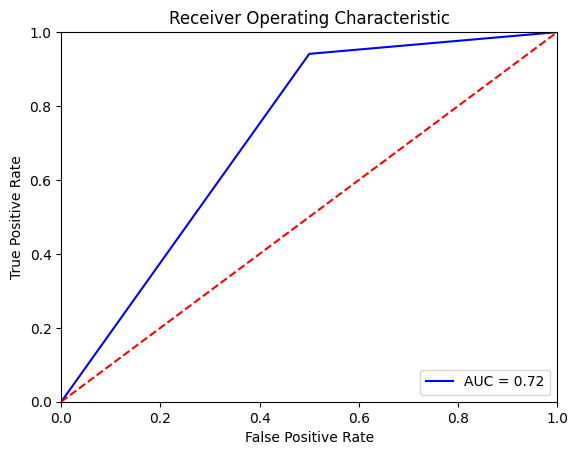

fold 1
3/3 [==============================] - 0s 661us/step
Accuracy: 0.81538
Confusion matrix: 
 [[ 4 11]
 [ 1 49]]


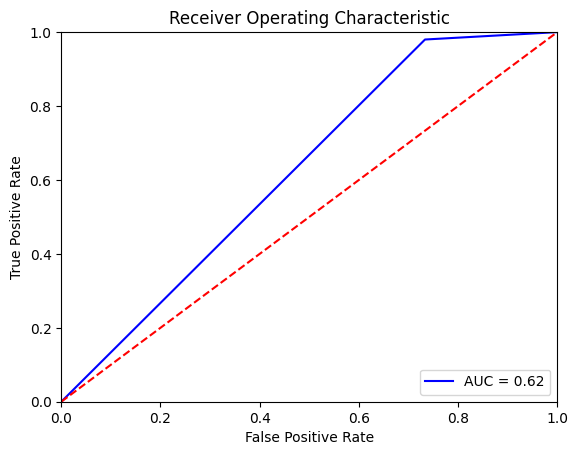

fold 2
3/3 [==============================] - 0s 644us/step
Accuracy: 0.8
Confusion matrix: 
 [[ 7 12]
 [ 1 45]]


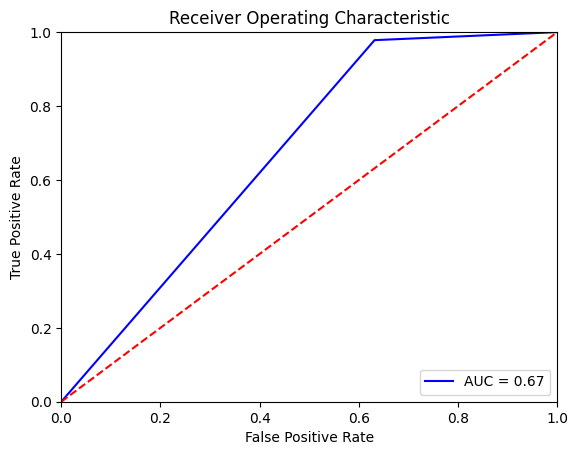

In [15]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

kfold = RepeatedKFold(n_repeats=1, n_splits=3, random_state=0)
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    print("fold %i" %i)

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train = keras.utils.to_categorical(y_train)
    
    model = create_model()
    
    model.fit(X_train, y_train, epochs=100, batch_size=39, verbose=0)

    y_pred = model.predict(X_test)
    y_pred = tf.argmax(y_pred, axis=1)
    y_test = tf.constant(y_test)

    accuracy = np.round(accuracy_score(y_test, y_pred), 5)
    print(f'Accuracy: {accuracy}')
  
    print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred))
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()